In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l1, l2
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [178]:

# Misalnya dataset kamu sudah dalam bentuk pandas DataFrame
dataset = pd.read_csv("./dataset_fixeds.csv")
df = pd.read_csv("./dataset_fixeds.csv")
df['timeStamps'] = pd.to_datetime(df['timeStamps'])
df.set_index('timeStamps', inplace=True)
# Menentukan fitur dan target
features = dataset[['oldBitrates', 'streamBandwidths', 
                    'estimatedBandwidths','bufferSizes','bufferingStates',]]  # Pilih beberapa fitur
# features = dataset[['oldBitrates']]  # Pilih beberapa fitur
target = dataset['newBitrates']  # Target
scaler_features = MinMaxScaler()
features_scaled = scaler_features.fit_transform(features)

scaler_target = MinMaxScaler()
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))
# Normalisasi data
train_features, test_features, train_target, test_target = train_test_split(
    features_scaled, target_scaled, test_size=0.2, shuffle=False,random_state=42)

print("train features",train_features.shape)
print("train target",train_target.shape)

target

# Membuat dataset baru untuk target dan menyimpannya
dataset_target = pd.DataFrame(target, columns=['newBitrates'])
dataset_target.to_csv('./dataset_target_scaled.csv', index=False)


train features (470, 5)
train target (470, 1)


In [41]:
def create_sequences(X, y, timesteps):
    Xs, ys = [], []
    for i in range(len(X) - timesteps):
        Xs.append(X[i:i+timesteps])
        ys.append(y[i+timesteps])
    return np.array(Xs), np.array(ys)

sequence_length = 10
X_train, y_train = create_sequences(train_features, train_target, sequence_length)
X_test, y_test = create_sequences(test_features, test_target, sequence_length)

print("X_train" ,X_train.shape)
print("y_train" ,y_train.shape)

print("X_test" ,X_test.shape)
print("y_test" ,y_test.shape)


X_train (460, 10, 3)
y_train (460, 1)
X_test (108, 10, 3)
y_test (108, 1)


In [172]:
model = Sequential()
# model.add(GRU(units=128, return_sequences=True, 
#               kernel_regularizer=l2(0.001),   
#               input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.1))
# model.add(Dense(1,activation="linear"))
# model.compile(optimizer='adam')
# model.summary()
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
# model.add(GRU(units=256, return_sequences=True, kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(GRU(units=128, activation="relu", return_sequences=True, kernel_regularizer=l2(0.0015)))
# model.add(Dropout(0.1))
# model.add(GRU(units=64, activation="relu", return_sequences=False))
# model.add(Dense(1, activation="linear"))
# model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=["accuracy"])

# percobaan kelima
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# model.add(GRU(units=128, return_sequences=True, kernel_regularizer=l2(0.0005), input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.1))
# model.add(GRU(units=64, activation="relu", return_sequences=True, kernel_regularizer=l2(0.0005)))
# model.add(Dropout(0.1))
# model.add(GRU(units=32, activation="relu", return_sequences=False))
# model.add(Dense(1, activation="linear"))
# model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=["accuracy"])

# history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1, validation_data=(X_test, y_test))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.add(GRU(units=128, return_sequences=True, kernel_regularizer=l2(0.0004), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(units=128, activation="relu", return_sequences=False))
model.add(Dense(1, activation="linear"))
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=["accuracy"])




In [173]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train,callbacks=[early_stopping],  epochs=100, batch_size=32, validation_split=0.2, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.0000e+00 - loss: 0.0818 - val_accuracy: 0.0833 - val_loss: 0.0568
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0447 - val_accuracy: 0.0833 - val_loss: 0.0293
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 0.0422 - val_accuracy: 0.0833 - val_loss: 0.0424
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 0.0369 - val_accuracy: 0.0833 - val_loss: 0.0414
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0172 - loss: 0.0402 - val_accuracy: 0.0833 - val_loss: 0.0422
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0354 - loss: 0.0343 - val_accuracy: 0.0833 - val_loss: 0.0573
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0320 - loss: 0.0239 - val_accuracy: 0.0833 - val_loss: 0.0510


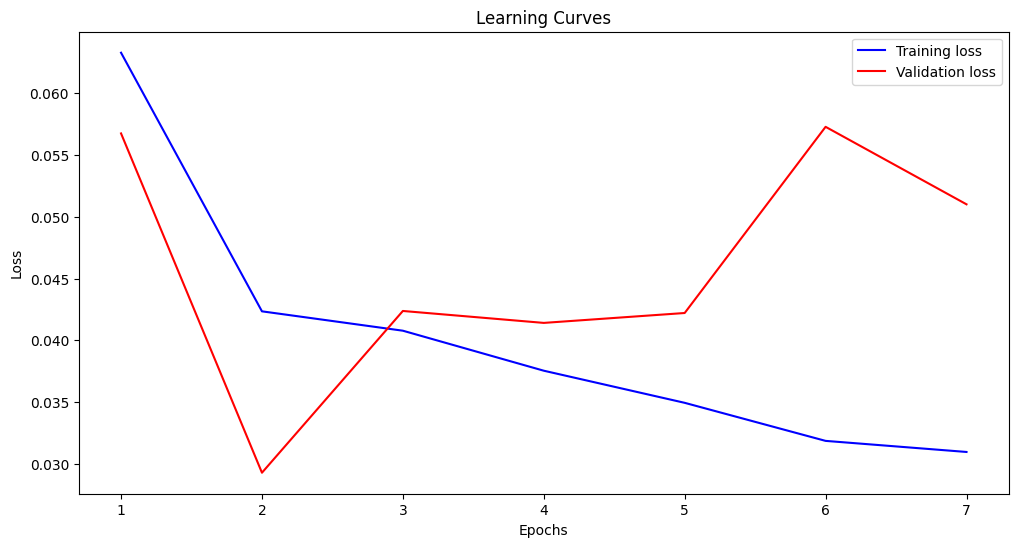

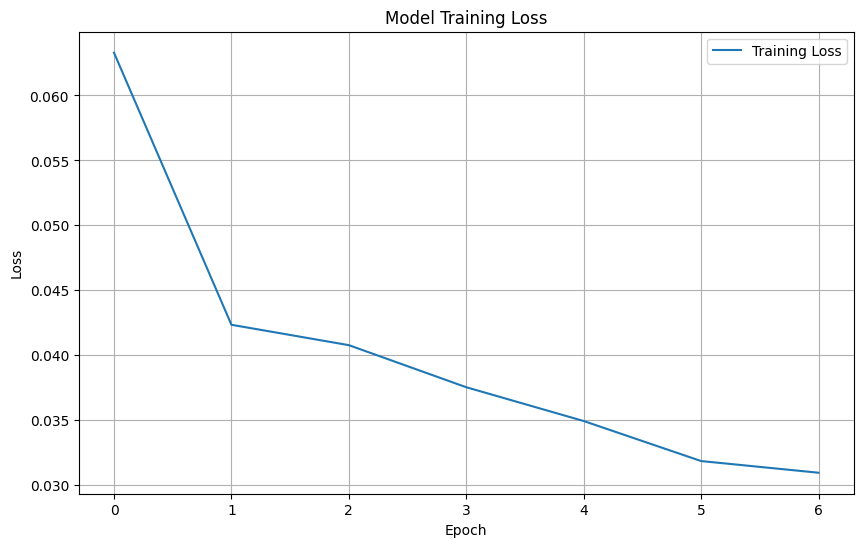

In [174]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss'], loc='upper right')
plt.grid(True)
plt.show()


In [1]:
# Cek stasioneritas untuk y_train
from statsmodels.tsa.stattools import adfuller

result_train = adfuller(y_train)
print('ADF Statistic (Train):', result_train[0])
print('p-value (Train):', result_train[1])

if result_train[1] > 0.05:
    print("y_train belum stasioner, kita perlu differencing.")
    y_train_diff = y_train.diff().dropna()  # Apply differencing buat bikin stasioner
else:
    print("y_train udah stasioner.")
    y_train_diff = y_train

NameError: name 'y_train' is not defined